In [1]:
pip install pycaret[mlops]

In [2]:
pip install pycaret

In [3]:
pip install gradio

In [4]:
import pycaret
pycaret.__version__

'3.1.0'

In [6]:
import pandas as pd
data = pd.read_csv("instagram.csv")
data.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


In [7]:
data.dropna(inplace=True)

In [8]:
from pycaret.classification import *
stp = setup(data, target = 'rating', use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,596
1,Target,rating
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original data shape,"(210542, 3)"
5,Transformed data shape,"(210542, 3)"
6,Transformed train set shape,"(147379, 3)"
7,Transformed test set shape,"(63163, 3)"
8,Categorical features,2
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [9]:
comp_modes = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.4427,0.0000,0.1776,0.2176,0.1099,0.0007,0.0106,2.8160
dummy,Dummy Classifier,0.4426,0.5000,0.1770,0.0783,0.1086,0.0000,0.0000,2.8090
gbc,Gradient Boosting Classifier,0.3189,0.5021,0.1632,0.3678,0.0759,0.0025,0.0198,33.5190
lightgbm,Light Gradient Boosting Machine,0.1952,0.5025,0.1484,0.3907,0.0405,0.0028,0.0250,8.2280
ada,Ada Boost Classifier,0.1908,0.5005,0.2807,0.1641,0.0906,0.0005,0.0065,5.8920
dt,Decision Tree Classifier,0.1860,0.5005,0.1883,0.1877,0.0598,0.0007,0.0074,2.6850
knn,K Neighbors Classifier,0.1327,0.5012,0.1943,0.3693,0.0501,0.0021,0.0202,4.3800
rf,Random Forest Classifier,0.1318,0.5013,0.1930,0.3023,0.0475,0.0012,0.0117,5.6410
lda,Linear Discriminant Analysis,0.1308,0.5013,0.1921,0.2162,0.0456,0.0003,0.0030,2.8900
lr,Logistic Regression,0.1307,0.5027,0.1928,0.4947,0.0463,0.0008,0.0096,9.1140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
lr_multiclass = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1308,0.5026,0.1308,0.6825,0.0316,0.0009,0.0110
1,0.1304,0.5024,0.2337,0.3887,0.0554,0.0004,0.0054
2,0.1305,0.5025,0.1305,0.6474,0.0313,0.0005,0.0068
3,0.1308,0.5028,0.2341,0.3791,0.0555,0.0008,0.0094
4,0.1308,0.5030,0.1308,0.6664,0.0315,0.0008,0.0110
5,0.1309,0.5024,0.1309,0.6187,0.0320,0.0010,0.0113
6,0.1308,0.5020,0.2345,0.4630,0.0567,0.0009,0.0111
7,0.1312,0.5031,0.2347,0.3522,0.0567,0.0013,0.0146
8,0.1305,0.5026,0.2339,0.4010,0.0557,0.0006,0.0077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

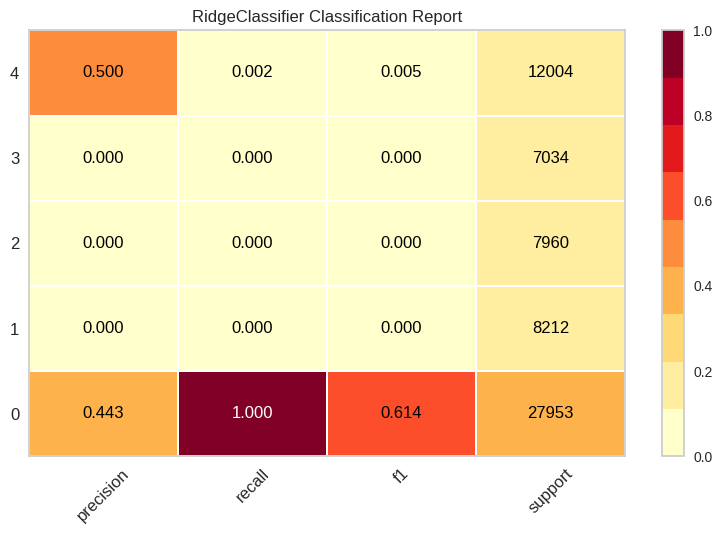

In [12]:
plot_model(comp_modes, plot = 'class_report')

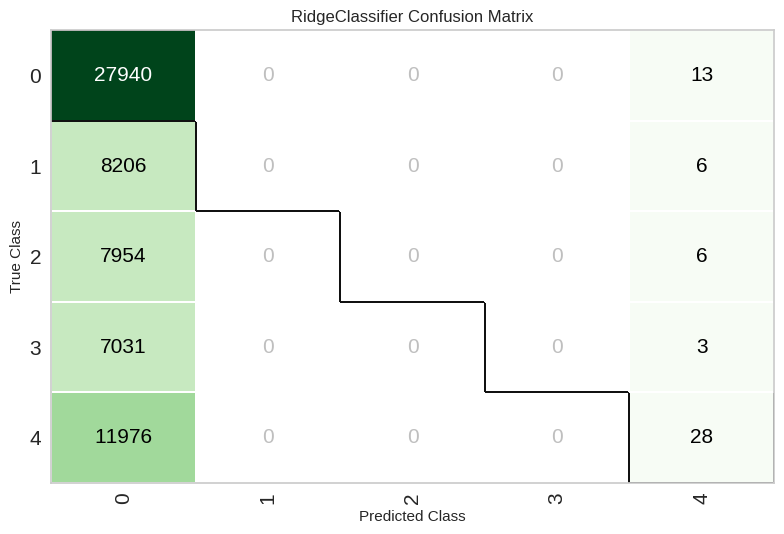

In [13]:
plot_model(comp_modes, plot = 'confusion_matrix')

In [14]:
pred = predict_model(comp_modes)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4428,0,0.4428,0.2910,0.2725,0.0008,0.0129


In [15]:
pred.head()

,review_description,review_date,rating,prediction_label
176181,"when i click on a post, profile, or comments i...",2019-08-19 00:19:03,0,1
172496,"As of the new update, it keeps on closing on i...",2019-11-14 03:50:16,1,1
83046,I've been using instagram for more than a year...,2021-07-16 01:41:49,0,1
204360,I hate the new Instagram update feels like a s...,2020-01-10 05:11:31,0,1
162750,Now is good but older insta is best,2023-07-02 16:02:04,2,1


In [16]:
# create new data by dropping 'Prediction' column
new_data = data.copy()
new_data.drop('rating', axis= 1, inplace = True)
new_data.head()

,review_description,review_date
0,"The app is good for connecting with friends, f...",2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2023-07-22 21:37:09
2,Instagram is the best of all the social media....,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,2023-07-17 16:47:04


In [17]:
pred_new = predict_model(comp_modes, data = new_data)
pred_new.head()

,review_description,review_date,prediction_label
0,"The app is good for connecting with friends, f...",2023-07-11 23:57:07,1
1,"Used to be my favorite social media app, but ""...",2023-07-22 21:37:09,1
2,Instagram is the best of all the social media....,2023-07-25 03:24:58,1
3,"I love this app.. but as of late, I have been ...",2023-07-09 04:49:57,1
4,Used to be a great app but there are so many m...,2023-07-17 16:47:04,1


In [18]:
saved_model = save_model(compare_models, 'Instagram_Reviews_Multiclass_Binary_Classification')

Transformation Pipeline and Model Successfully Saved


In [19]:
load_model = load_model('Instagram_Reviews_Multiclass_Binary_Classification')
load_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                 TransformerWrapper(exclude=None,
                                    include=['review_description',
                                             'review_date'],
                                    transformer=TargetEncoder(cols=['review_description',
                                                                    'review_date'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model', <function compare_models at 0x7dcd8b0d3d00>)],
         verbose=False)

In [23]:
create_app(load_model)

ReadTimeout: ignored